In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_data = pd.read_csv('train (1).csv')
test_data = pd.read_csv('test (2).csv')

In [3]:
train_data.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [4]:
train_data.shape

(14396, 18)

In [5]:
train_data.columns

Index(['Id', 'Artist Name', 'Track Name', 'Popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [7]:
train_data.isnull().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [8]:
values = {"Popularity": train_data["Popularity"].mean(), "key": train_data["key"].mean(), "instrumentalness": train_data["instrumentalness"].mean()}
train_data = train_data.fillna(value=values)

In [9]:
train_data.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.000000,0.334,0.536,9.000000,-6.649,0,0.0381,0.378000,0.178129,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.000000,0.725,0.747,11.000000,-5.545,1,0.0876,0.027200,0.046800,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,44.525208,0.584,0.804,7.000000,-6.094,1,0.0619,0.000968,0.635000,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.000000,0.515,0.308,5.953781,-14.711,1,0.0312,0.907000,0.021300,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.000000,0.565,0.777,6.000000,-5.096,0,0.2490,0.183000,0.178129,0.211,0.619,88.311,254145.0,4,5


In [10]:
train_data.isnull().sum()

Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [11]:
train_data.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.216285,0.165517,0.235967,3.015874,4.057362,0.479944,0.085157,0.310922,0.264206,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,4.000000,-9.538000,0.000000,0.034800,0.004280,0.000295,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,5.953781,-7.013500,1.000000,0.047100,0.081450,0.053400,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,8.000000,-5.162000,1.000000,0.083100,0.432250,0.178129,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [12]:
train_data["Class"].unique()

array([ 9,  6, 10,  2,  5,  0,  8,  4,  3,  1,  7], dtype=int64)

In [13]:
train_data["Class"].nunique()

11

In [14]:
train_data = train_data.drop("Id",axis = 1)

In [15]:
train_data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Marina Maximilian,Not Afraid,37.000000,0.334,0.536,9.000000,-6.649,0,0.0381,0.378000,0.178129,0.106,0.235,152.429,204947.0,4,9
1,The Black Keys,Howlin' for You,67.000000,0.725,0.747,11.000000,-5.545,1,0.0876,0.027200,0.046800,0.104,0.380,132.921,191956.0,4,6
2,Royal & the Serpent,phuck u,44.525208,0.584,0.804,7.000000,-6.094,1,0.0619,0.000968,0.635000,0.284,0.635,159.953,161037.0,4,10
3,Detroit Blues Band,Missing You,12.000000,0.515,0.308,5.953781,-14.711,1,0.0312,0.907000,0.021300,0.300,0.501,172.472,298093.0,3,2
4,Coast Contra,My Lady,48.000000,0.565,0.777,6.000000,-5.096,0,0.2490,0.183000,0.178129,0.211,0.619,88.311,254145.0,4,5


<AxesSubplot:>

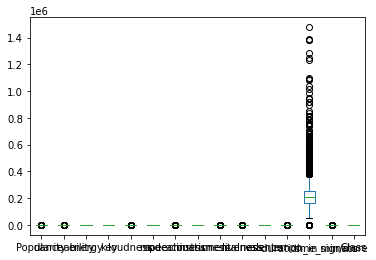

In [16]:
train_data.plot.box()

<AxesSubplot:ylabel='Frequency'>

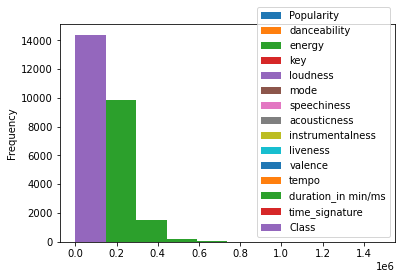

In [17]:
train_data.plot.hist()

<AxesSubplot:xlabel='Popularity', ylabel='Class'>

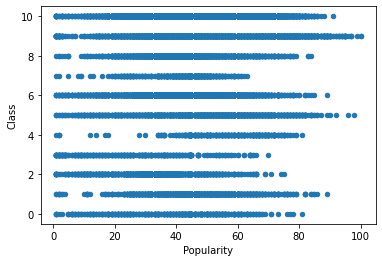

In [18]:
train_data.plot.scatter(x="Popularity",y="Class")

<AxesSubplot:xlabel='danceability', ylabel='Class'>

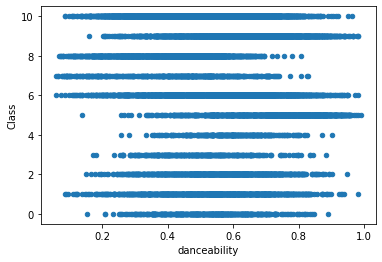

In [19]:
train_data.plot.scatter(x="danceability",y="Class")

<AxesSubplot:xlabel='mode', ylabel='Class'>

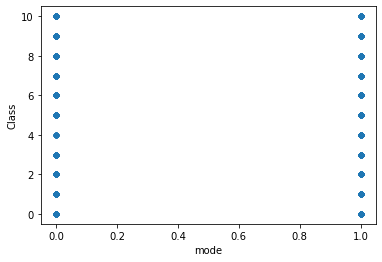

In [20]:
train_data.plot.scatter(x="mode",y="Class")

<AxesSubplot:xlabel='duration_in min/ms', ylabel='Class'>

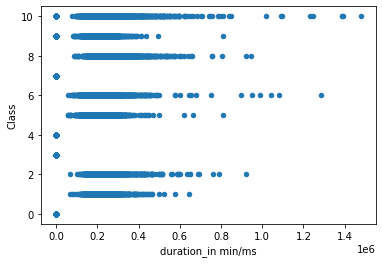

In [21]:
train_data.plot.scatter(x="duration_in min/ms",y="Class")

In [22]:
''''threshold = 3
X_features = ['Popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_in min/ms','time_signature']
# Iterate over each column in the DataFrame
for column in X_features:
    # Calculate the mean and standard deviation of the column
    mean = train_data[column].mean()
    std = train_data[column].std()

    # Define the condition for identifying outliers
    condition = (train_data[column] > (mean + threshold * std)) | (train_data[column] < (mean - threshold * std))

    # Filter out rows that contain outliers for the current column
train_data = train_data[~condition]
''''

SyntaxError: EOL while scanning string literal (<ipython-input-22-5a69a0fda904>, line 14)

In [ ]:
train_data.shape

<AxesSubplot:ylabel='Frequency'>

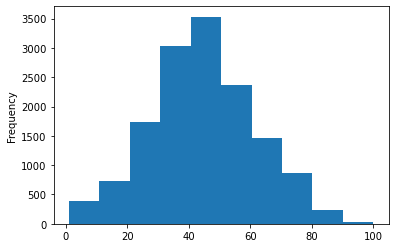

In [23]:
train_data['Popularity'].plot.hist()


<AxesSubplot:ylabel='Frequency'>

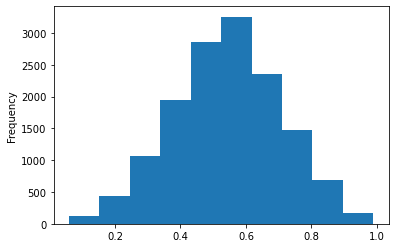

In [24]:
train_data['danceability'].plot.hist()


<AxesSubplot:ylabel='Frequency'>

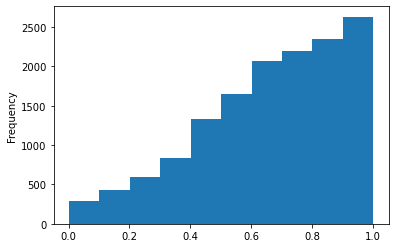

In [25]:
train_data['energy'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

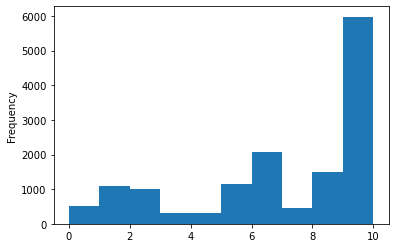

In [26]:
train_data['Class'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

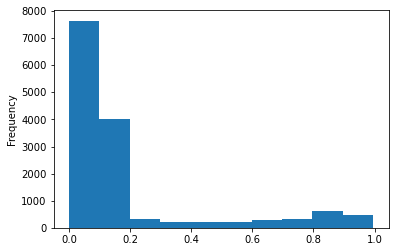

In [27]:
train_data['instrumentalness'].plot.hist()

<AxesSubplot:>

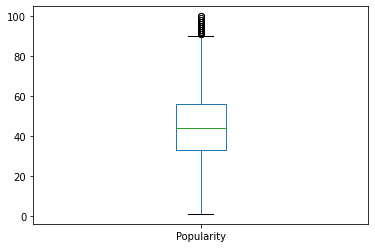

In [28]:
train_data['Popularity'].plot.box()

In [29]:
train_data['Track Name'].nunique()


12455

In [30]:
train_data['Artist Name'].nunique()

7913

In [31]:
correlation = train_data.corr()['Class']

# Print correlation values
print(correlation)

Popularity            0.156752
danceability         -0.101152
energy                0.215611
key                  -0.003924
loudness              0.174111
mode                 -0.040092
speechiness          -0.062784
acousticness         -0.240609
instrumentalness     -0.025357
liveness              0.040101
valence              -0.080036
tempo                 0.034496
duration_in min/ms    0.203822
time_signature        0.040053
Class                 1.000000
Name: Class, dtype: float64


In [32]:
train_data = train_data.drop(['Artist Name','Track Name'],axis=1)

In [33]:
train_data.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,37.000000,0.334,0.536,9.000000,-6.649,0,0.0381,0.378000,0.178129,0.106,0.235,152.429,204947.0,4,9
1,67.000000,0.725,0.747,11.000000,-5.545,1,0.0876,0.027200,0.046800,0.104,0.380,132.921,191956.0,4,6
2,44.525208,0.584,0.804,7.000000,-6.094,1,0.0619,0.000968,0.635000,0.284,0.635,159.953,161037.0,4,10
3,12.000000,0.515,0.308,5.953781,-14.711,1,0.0312,0.907000,0.021300,0.300,0.501,172.472,298093.0,3,2
4,48.000000,0.565,0.777,6.000000,-5.096,0,0.2490,0.183000,0.178129,0.211,0.619,88.311,254145.0,4,5


In [34]:
X = train_data.iloc[:,:-1]
X.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,37.000000,0.334,0.536,9.000000,-6.649,0,0.0381,0.378000,0.178129,0.106,0.235,152.429,204947.0,4
1,67.000000,0.725,0.747,11.000000,-5.545,1,0.0876,0.027200,0.046800,0.104,0.380,132.921,191956.0,4
2,44.525208,0.584,0.804,7.000000,-6.094,1,0.0619,0.000968,0.635000,0.284,0.635,159.953,161037.0,4
3,12.000000,0.515,0.308,5.953781,-14.711,1,0.0312,0.907000,0.021300,0.300,0.501,172.472,298093.0,3
4,48.000000,0.565,0.777,6.000000,-5.096,0,0.2490,0.183000,0.178129,0.211,0.619,88.311,254145.0,4


In [35]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# assume your data is stored in a numpy array called X
scaler = MinMaxScaler(feature_range=(0, 1)) # create the scaler object and specify the desired range
x_features = ["Popularity","key","loudness","tempo","duration_in min/ms","time_signature"]
from_x = X[x_features]
scaler.fit(from_x) 
X_scaled = scaler.transform(from_x)
X[x_features] = X_scaled

In [36]:
X.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,0.363636,0.334,0.536,0.800000,0.806485,0,0.0381,0.378000,0.178129,0.106,0.235,0.652214,0.138741,0.75
1,0.666667,0.725,0.747,1.000000,0.833220,1,0.0876,0.027200,0.046800,0.104,0.380,0.547814,0.129947,0.75
2,0.439649,0.584,0.804,0.600000,0.819925,1,0.0619,0.000968,0.635000,0.284,0.635,0.692479,0.109016,0.75
3,0.111111,0.515,0.308,0.495378,0.611251,1,0.0312,0.907000,0.021300,0.300,0.501,0.759476,0.201797,0.50
4,0.474747,0.565,0.777,0.500000,0.844094,0,0.2490,0.183000,0.178129,0.211,0.619,0.309078,0.172046,0.75


In [37]:
y = train_data.iloc[:,-1]
y.head()

0     9
1     6
2    10
3     2
4     5
Name: Class, dtype: int64

In [38]:
'''from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly','sigmoid','precomputed'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

# Create the SVM classifier
svm_classifier = svm.SVC()

# Perform grid search
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)

Train SVM with best parameters
best_svm = svm.SVC(**best_params)
best_svm.fit(X_train, y_train)

# Make predictions with the best SVM
y_pred = best_svm.predict(X_test)

# Calculate accuracy with the best SVM
accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy:", accuracy)
'''

'from sklearn import svm\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import accuracy_score\n\n# Define the parameter grid\nparam_grid = {\n    \'kernel\': [\'linear\', \'rbf\', \'poly\',\'sigmoid\',\'precomputed\'],\n    \'C\': [0.1, 1, 10],\n    \'gamma\': [0.1, 1, 10]\n}\n\n# Create the SVM classifier\nsvm_classifier = svm.SVC()\n\n# Perform grid search\ngrid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, scoring=\'accuracy\', cv=5)\ngrid_search.fit(X, y)\n\n# Get the best parameters and best score\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\nprint(best_params)\nprint(best_score)\n\nTrain SVM with best parameters\nbest_svm = svm.SVC(**best_params)\nbest_svm.fit(X_train, y_train)\n\n# Make predictions with the best SVM\ny_pred = best_svm.predict(X_test)\n\n# Calculate accuracy with the best SVM\naccuracy = accuracy_score(y_test, y_pred)\nprint("Best Accuracy:", accuracy)\n'

In [39]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = svm.SVC(kernel='rbf')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5090277777777777


In [40]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


cb.fit(X_train, y_train, 
        eval_set=(X_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(cb.is_fitted()))
print('CatBoost model parameters:')
print(cb.get_params())


CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [41]:
cb.score(X_train,y_train)

0.45380340395970825

In [42]:
cb.score(X_test,y_test)

0.4375

In [43]:
y_pred_cb = cb.predict(X_test)

# Calculate the accuracy of the model
accuracy_cb = accuracy_score(y_test, y_pred_cb)
print("Accuracy:", accuracy_cb)


Accuracy: 0.4375


In [44]:
#y = y.ravel()  # Reshape to a 1-dimensional array


In [45]:
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [46]:
'''from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Create individual classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create an ensemble using VotingClassifier
ensemble_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('gb', gb_clf),('cb',cb),('svc',clf)],
    voting='soft'  # Use majority voting
)

 #Fit the ensemble on the training data
ensemble_clf.fit(X_train, y_train)

 #Make predictions on the test data
y_pred_votes = np.column_stack((y_pred_cb, y_pred))
y_pred = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=y_pred_votes)

# Calculate the accuracy of the ensemble
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
'''

'from sklearn.ensemble import VotingClassifier\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.ensemble import GradientBoostingClassifier\nfrom sklearn.metrics import accuracy_score\n\n\n# Create individual classifiers\nrf_clf = RandomForestClassifier(n_estimators=100, random_state=42)\ngb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)\n\n# Create an ensemble using VotingClassifier\nensemble_clf = VotingClassifier(\n    estimators=[(\'rf\', rf_clf), (\'gb\', gb_clf),(\'cb\',cb),(\'svc\',clf)],\n    voting=\'soft\'  # Use majority voting\n)\n\n #Fit the ensemble on the training data\nensemble_clf.fit(X_train, y_train)\n\n #Make predictions on the test data\ny_pred_votes = np.column_stack((y_pred_cb, y_pred))\ny_pred = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=y_pred_votes)\n\n# Calculate the accuracy of the ensemble\naccuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy:", accuracy)\n'

In [47]:
'''rf_clf = rf_clf.fit(X_train, y_train)
gb_clf = gb_clf.fit(X_train, y_train)
cb = cb.fit(X_train, y_train)
clf = clf.fit(X_train, y_train)
ensemble_clf = ensemble_clf.fit(X_train, y_train)
'''

'rf_clf = rf_clf.fit(X_train, y_train)\ngb_clf = gb_clf.fit(X_train, y_train)\ncb = cb.fit(X_train, y_train)\nclf = clf.fit(X_train, y_train)\nensemble_clf = ensemble_clf.fit(X_train, y_train)\n'

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.5111111111111111


In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

Accuracy: 0.40208333333333335


In [50]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

Accuracy: 0.3684027777777778


In [51]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=42)

# Train the classifier
lr_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_classifier.predict(X_test)

# Evaluate the classifier
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

Accuracy: 0.4829861111111111


C:\Users\JCC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)

Accuracy: 0.45729166666666665


In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the classifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", accuracy_gb)

Accuracy: 0.5447916666666667


In [52]:
test_data.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,Juan Pablo Vega,Matando (feat. Vic Mirallas),NaN,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14398,Kappi Kat,Baarish,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,14399,Plain White T's,Hey There Delilah,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,NaN,0.1140,0.298,103.971,232533.0,4
3,14400,WALK THE MOON,Different Colors,52.0,0.480,0.826,NaN,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,14401,Peled,◊ß◊®◊ô◊ñ,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,NaN,0.0672,0.805,76.030,118439.0,4


In [53]:
test_data.isnull().sum()

Id                      0
Artist Name             0
Track Name              0
Popularity             95
danceability            0
energy                  0
key                   405
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      836
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

In [54]:
values = {"Popularity": train_data["Popularity"].mean(), "key": train_data["key"].mean(), "instrumentalness": train_data["instrumentalness"].mean()}
test_data = test_data.fillna(value=values)

In [55]:
test_data.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,Juan Pablo Vega,Matando (feat. Vic Mirallas),44.525208,0.691,0.670,2.000000,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14398,Kappi Kat,Baarish,14.000000,0.461,0.777,2.000000,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,14399,Plain White T's,Hey There Delilah,80.000000,0.656,0.291,2.000000,-10.572,1,0.0293,0.872000,0.178129,0.1140,0.298,103.971,232533.0,4
3,14400,WALK THE MOON,Different Colors,52.000000,0.480,0.826,5.953781,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,14401,Peled,◊ß◊®◊ô◊ñ,23.000000,0.734,0.729,1.000000,-6.381,0,0.2830,0.147000,0.178129,0.0672,0.805,76.030,118439.0,4


In [56]:
test_data = test_data.drop("Id",axis = 1)

In [57]:
test_data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,Juan Pablo Vega,Matando (feat. Vic Mirallas),44.525208,0.691,0.670,2.000000,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,Kappi Kat,Baarish,14.000000,0.461,0.777,2.000000,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,Plain White T's,Hey There Delilah,80.000000,0.656,0.291,2.000000,-10.572,1,0.0293,0.872000,0.178129,0.1140,0.298,103.971,232533.0,4
3,WALK THE MOON,Different Colors,52.000000,0.480,0.826,5.953781,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,Peled,◊ß◊®◊ô◊ñ,23.000000,0.734,0.729,1.000000,-6.381,0,0.2830,0.147000,0.178129,0.0672,0.805,76.030,118439.0,4


In [58]:
test_data = test_data.drop(['Artist Name','Track Name'],axis=1)

In [59]:
test_data.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,44.525208,0.691,0.670,2.000000,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14.000000,0.461,0.777,2.000000,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,80.000000,0.656,0.291,2.000000,-10.572,1,0.0293,0.872000,0.178129,0.1140,0.298,103.971,232533.0,4
3,52.000000,0.480,0.826,5.953781,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,23.000000,0.734,0.729,1.000000,-6.381,0,0.2830,0.147000,0.178129,0.0672,0.805,76.030,118439.0,4


In [60]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# assume your data is stored in a numpy array called X
scaler = MinMaxScaler(feature_range=(0, 1)) # create the scaler object and specify the desired range
x_features = ["Popularity","key","loudness","tempo","duration_in min/ms","time_signature"]
from_x = test_data[x_features]
X_scaled = scaler.fit_transform(from_x)
test_data[x_features] = X_scaled

In [61]:
test_data.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,0.453388,0.691,0.670,0.100000,0.766320,0,0.0941,0.075700,0.035200,0.1970,0.635,0.248959,0.141597,0.75
1,0.135417,0.461,0.777,0.100000,0.755919,1,0.0306,0.388000,0.923000,0.2910,0.525,0.690043,0.201004,0.75
2,0.822917,0.656,0.291,0.100000,0.670087,1,0.0293,0.872000,0.178129,0.1140,0.298,0.333496,0.164630,0.75
3,0.531250,0.480,0.826,0.495378,0.835224,1,0.0397,0.000797,0.000001,0.1250,0.687,0.285385,0.157211,0.75
4,0.229167,0.734,0.729,0.000000,0.786015,0,0.2830,0.147000,0.178129,0.0672,0.805,0.164850,0.083853,0.75


In [74]:
pred_for_test_data = gb_classifier.predict(test_data)

In [75]:
pred_for_test_data

array([ 6,  6,  9, ...,  6,  2, 10], dtype=int64)

In [76]:
pred_for_test_data.shape

(3600,)

In [77]:
id = pd.read_csv('test (2).csv')

In [78]:
submission_gb = id[["Id"]]

In [79]:
submission_gb["class"] = pred_for_test_data

<ipython-input-79-35578871bb0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_gb["class"] = pred_for_test_data


In [80]:
submission_gb.head()

,Id,class
0,14397,6
1,14398,6
2,14399,9
3,14400,10
4,14401,5


In [81]:
submission_gb.to_csv('submission_gb.csv',index=None)